In [58]:
# imports:-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold , SelectKBest , f_classif ,mutual_info_classif
from sklearn.base import TransformerMixin , BaseEstimator
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree

In [8]:
data=pd.read_csv("diabetes_prediction_dataset.csv")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [11]:
data.describe(include=["O"]).T

,count,unique,top,freq
gender,100000,3,Female,58552
smoking_history,100000,6,No Info,35816


In [12]:
object_cols=data.select_dtypes("object").columns
object_cols

Index(['gender', 'smoking_history'], dtype='object')

In [14]:
numeric_cols=data.select_dtypes("number").columns
numeric_cols

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [15]:
discrete_cols=data.select_dtypes(include=["int64"]).columns
discrete_cols

Index(['hypertension', 'heart_disease', 'blood_glucose_level', 'diabetes'], dtype='object')

In [16]:
continous_cols=data.select_dtypes(include=["float64"]).columns
continous_cols

Index(['age', 'bmi', 'HbA1c_level'], dtype='object')

<AxesSubplot:ylabel='diabetes'>

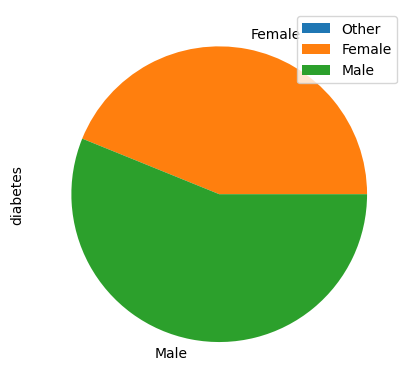

In [17]:
data.groupby(["gender"])["diabetes"].mean().sort_values(ascending=True).plot(kind="pie",legend=True)

<AxesSubplot:>

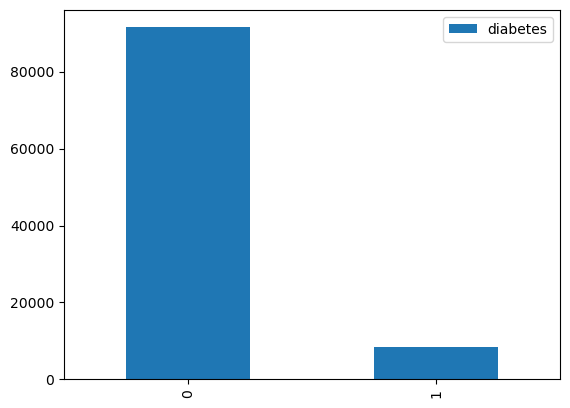

In [18]:
data["diabetes"].value_counts().plot(kind="bar",legend=True)

<AxesSubplot:xlabel='gender'>

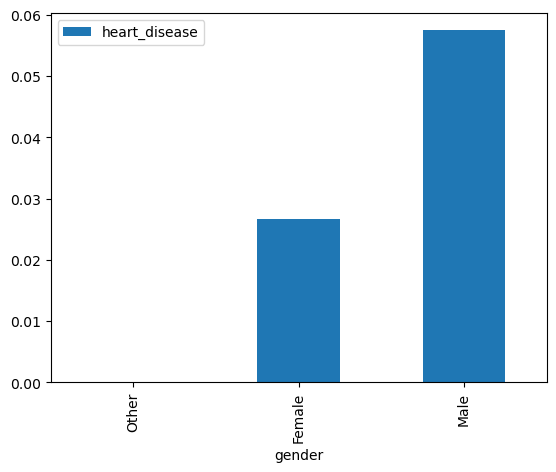

In [20]:
data.groupby(["gender"])["heart_disease"].mean().sort_values(ascending=True).plot(kind="bar",legend=True)

<AxesSubplot:ylabel='heart_disease'>

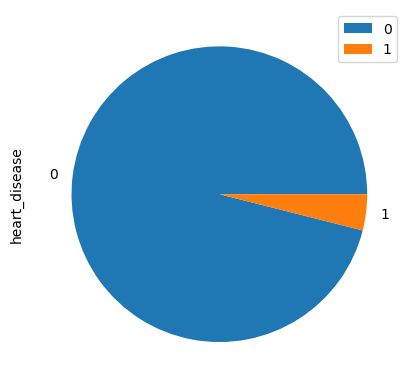

In [24]:
data["heart_disease"].value_counts().plot(kind="pie",legend=True)

<AxesSubplot:ylabel='Density'>

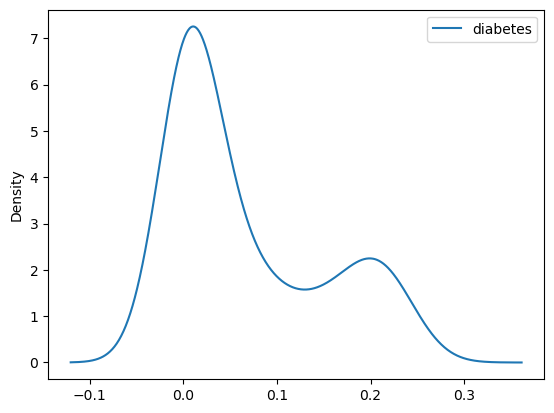

In [23]:
data.groupby(["age"])["diabetes"].mean().plot(kind="kde",legend=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

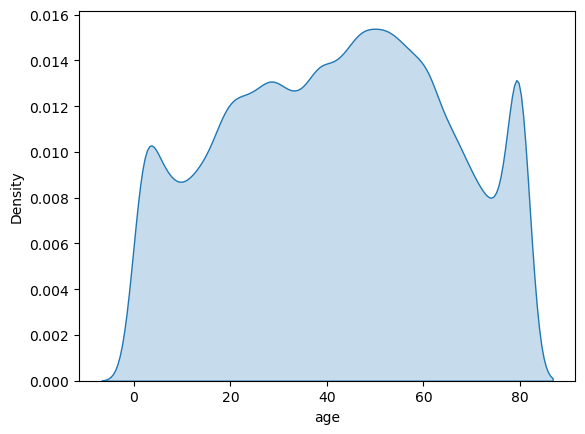

In [26]:
sns.kdeplot(data["age"],shade=True)

G:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hypertension', ylabel='Density'>

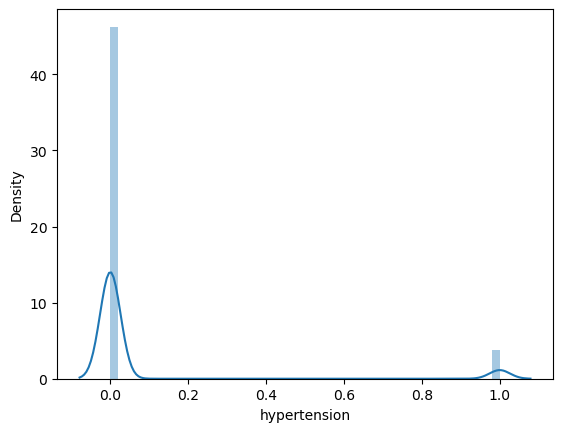

In [27]:
sns.distplot(data["hypertension"])

<AxesSubplot:ylabel='Frequency'>

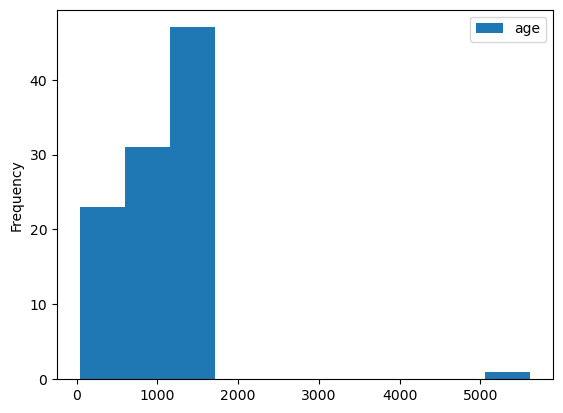

In [70]:
data["age"].value_counts().plot(kind="hist",legend=True)

<AxesSubplot:ylabel='Frequency'>

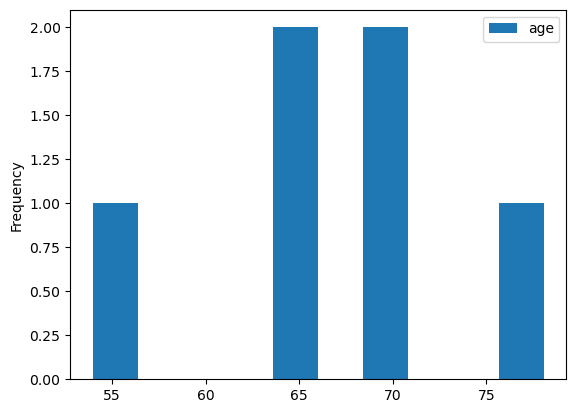

In [71]:
data.groupby(["smoking_history"])["age"].plot(kind="hist",legend=True)

G:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HbA1c_level', ylabel='Density'>

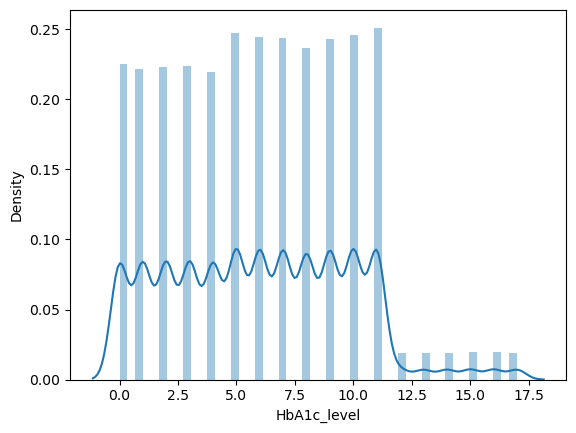

In [72]:
sns.distplot(data["HbA1c_level"])

In [ ]:
grid=sns.FacetGrid(data,col="heart_disease",row="gender")
grid.map(plt.hist,"age")
grid.add_legend()

In [ ]:
grid=sns.FacetGrid(data,row="blood_glucose_level")
grid.map(sns.pointplot,"bmi","diabetes","gender")
grid.add_legend()

G:\anaconda\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
G:\anaconda\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


In [ ]:
sns.kdeplot(data["age"],legend=True)
sns.kdeplot(data["HbA1c_level"],legend=True)


In [ ]:
sns.distplot(data["age"])
sns.distplolt(data["HbA1c_level"])

<AxesSubplot:ylabel='smoking_history'>

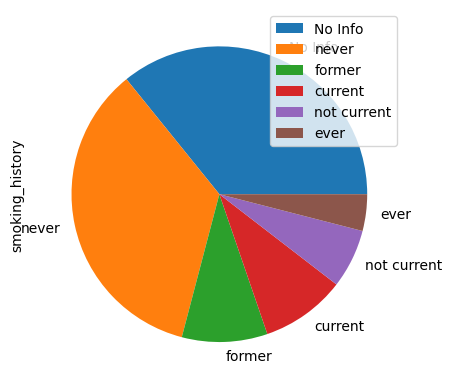

In [29]:
data["smoking_history"].value_counts().plot(kind="pie",legend=True)

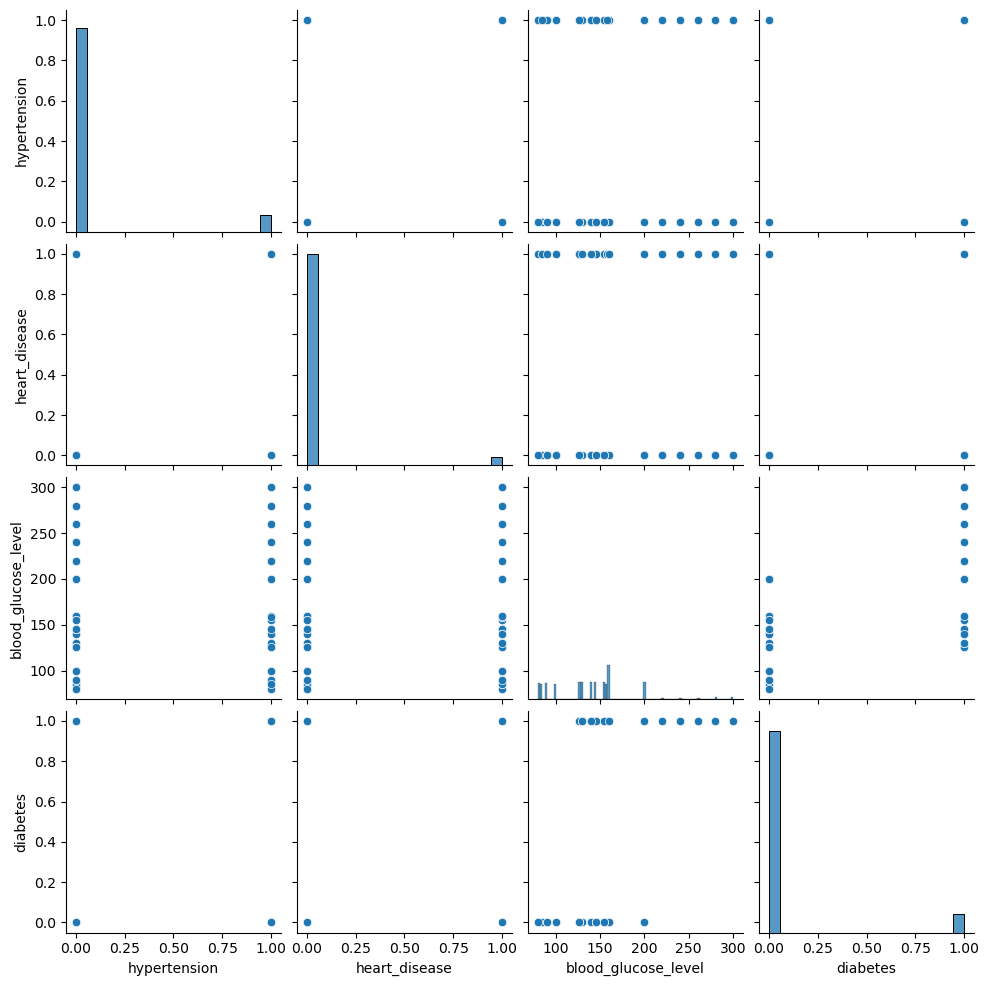

In [30]:
sns.pairplot(data.select_dtypes(include=["int64"]))

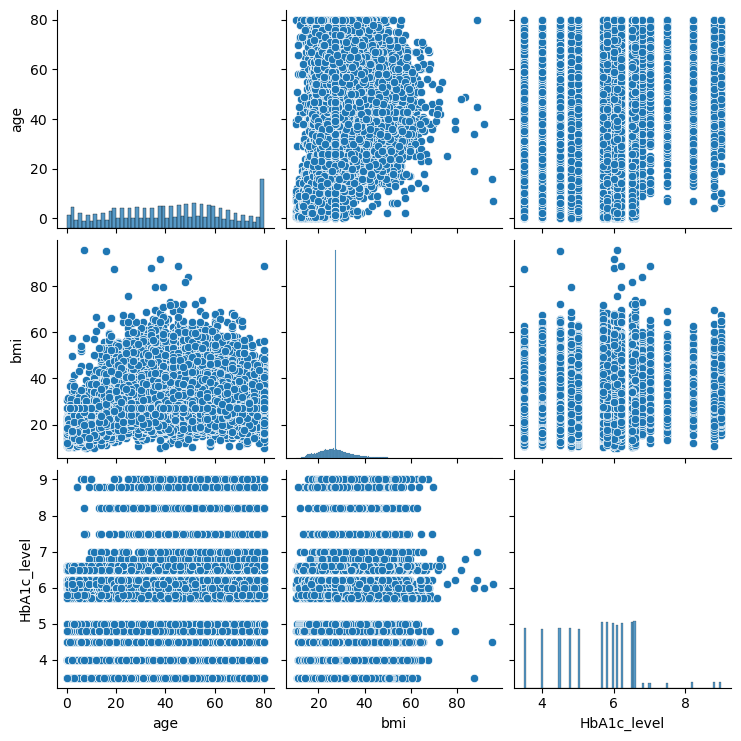

In [31]:
sns.pairplot(data.select_dtypes(include=["float64"]))

In [32]:
# check the missing values:

data.isna().mean()

gender                 0.0
age                    0.0
hypertension           0.0
heart_disease          0.0
smoking_history        0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
diabetes               0.0
dtype: float64

In [33]:
# Handle the missing values :

df=data

obj_cols=df.select_dtypes("object").columns
num_cols=df.select_dtypes("number").columns

df[obj_cols]=df[obj_cols].fillna(df[obj_cols].mode())
df[num_cols]=df[num_cols].fillna(df[num_cols].median())

In [35]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [36]:
# check the outliers:

data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<AxesSubplot:xlabel='blood_glucose_level'>

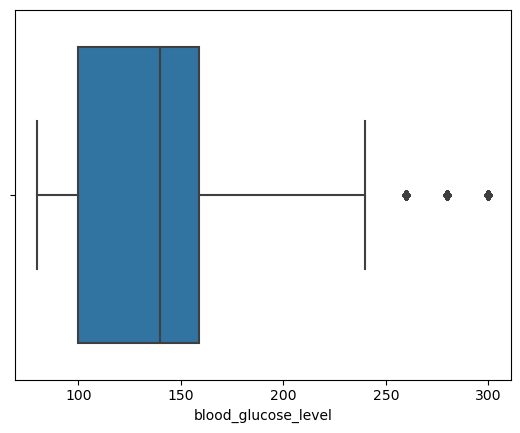

In [37]:
sns.boxplot(x=data["blood_glucose_level"])

<AxesSubplot:xlabel='blood_glucose_level'>

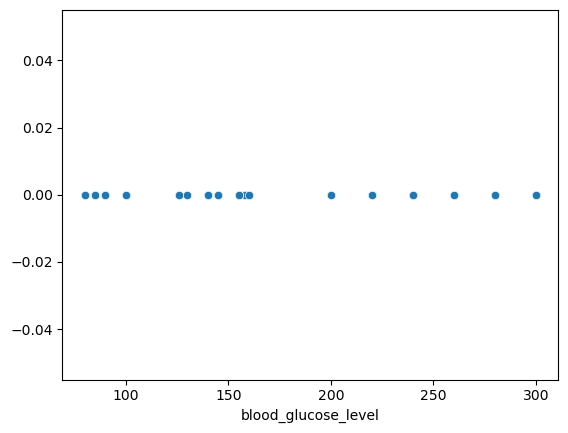

In [38]:
sns.scatterplot(x=data["blood_glucose_level"],y=np.zeros_like(data["blood_glucose_level"]))

In [40]:
# calc the outliert in blood_glucose_level:

q1,q3=data["blood_glucose_level"].quantile([0.25,0.75])
iqr=q3-q1
low_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
outliers=[]

for x in data["blood_glucose_level"]:
    if((x>upper_limit) or (x<low_limit)):
        outliers.append(x)
        
print(len(outliers))
print(f"low_limit={low_limit} and upper_limit={upper_limit}")
print(f"value of Q1={q1} , value of Q3={q3} and value of iqr={iqr}")
print(outliers)

2038
low_limit=11.5 and upper_limit=247.5
value of Q1=100.0 , value of Q3=159.0 and value of iqr=59.0
[260, 300, 280, 280, 300, 280, 300, 280, 260, 280, 260, 260, 300, 300, 280, 280, 300, 300, 300, 280, 260, 300, 300, 260, 260, 300, 300, 280, 260, 280, 280, 260, 300, 280, 260, 260, 300, 280, 280, 260, 300, 280, 300, 260, 300, 300, 260, 260, 280, 300, 300, 260, 260, 300, 300, 280, 280, 280, 280, 300, 280, 300, 280, 260, 300, 260, 260, 300, 280, 280, 260, 260, 300, 260, 300, 280, 260, 300, 280, 280, 300, 260, 280, 280, 280, 300, 260, 300, 280, 300, 300, 260, 280, 260, 300, 280, 280, 280, 280, 260, 300, 280, 260, 260, 260, 280, 260, 300, 280, 280, 300, 280, 280, 280, 260, 280, 260, 280, 300, 300, 280, 280, 260, 300, 260, 260, 280, 300, 300, 280, 280, 260, 260, 300, 300, 300, 280, 260, 300, 280, 260, 300, 300, 300, 260, 260, 300, 280, 300, 280, 260, 260, 300, 280, 260, 300, 300, 280, 280, 280, 280, 300, 280, 260, 300, 280, 300, 300, 260, 260, 300, 260, 280, 300, 260, 260, 280, 300, 260, 26

<AxesSubplot:xlabel='diabetes'>

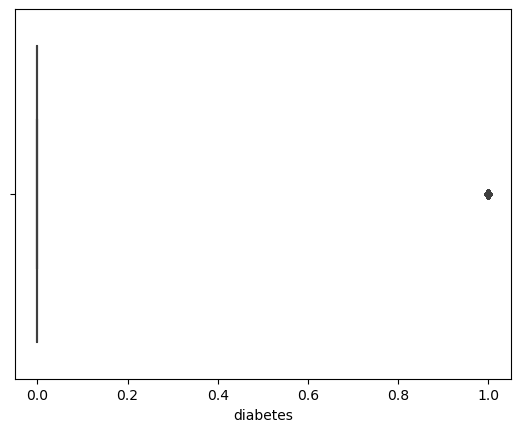

In [41]:
sns.boxplot(x=data["diabetes"])

<AxesSubplot:xlabel='diabetes'>

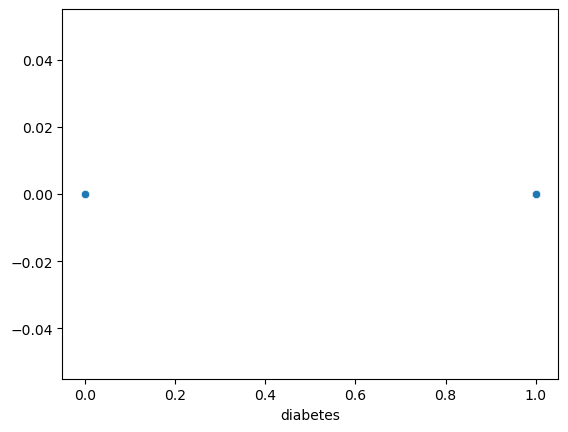

In [42]:
sns.scatterplot(x=data["diabetes"],y=np.zeros_like(data["diabetes"]))

In [43]:
# calc the outliert in blood_glucose_level:

q1,q3=data["diabetes"].quantile([0.25,0.75])
iqr=q3-q1
low_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
outliers=[]

for x in data["diabetes"]:
    if((x>upper_limit) or (x<low_limit)):
        outliers.append(x)
        
print(len(outliers))
print(f"low_limit={low_limit} and upper_limit={upper_limit}")
print(f"value of Q1={q1} , value of Q3={q3} and value of iqr={iqr}")
print(outliers)

8500
low_limit=0.0 and upper_limit=0.0
value of Q1=0.0 , value of Q3=0.0 and value of iqr=0.0
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [45]:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))


VarianceThreshold(threshold=0.01)

In [47]:
selector.get_support(indices=True)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [48]:
numeric_cols[selector.get_support(indices=True)]

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [49]:
data.select_dtypes("number").corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [50]:
data.select_dtypes("number").corr(method="spearman")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.254197,0.234424,0.351311,0.083634,0.075412,0.262076
hypertension,0.254197,1.000000,0.121262,0.147441,0.066752,0.056369,0.197823
heart_disease,0.234424,0.121262,1.000000,0.069601,0.055188,0.045133,0.171727
bmi,0.351311,0.147441,0.069601,1.000000,0.063368,0.058261,0.200061
HbA1c_level,0.083634,0.066752,0.055188,0.063368,1.000000,0.090891,0.328705
blood_glucose_level,0.075412,0.056369,0.045133,0.058261,0.090891,1.000000,0.274217
diabetes,0.262076,0.197823,0.171727,0.200061,0.328705,0.274217,1.000000


In [51]:
data.select_dtypes("number").corr(method="pearson")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [53]:
data.select_dtypes("number").corr(method="kendall")

G:\anaconda\lib\site-packages\scipy\stats\_stats_py.py:5215: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.209052,0.192791,0.247000,0.058317,0.052445,0.215532
hypertension,0.209052,1.000000,0.121262,0.123481,0.056567,0.047657,0.197823
heart_disease,0.192791,0.121262,1.000000,0.058291,0.046767,0.038157,0.171727
bmi,0.247000,0.123481,0.058291,1.000000,0.044983,0.041260,0.167550
HbA1c_level,0.058317,0.056567,0.046767,0.044983,1.000000,0.065109,0.278549
blood_glucose_level,0.052445,0.047657,0.038157,0.041260,0.065109,1.000000,0.231834
diabetes,0.215532,0.197823,0.171727,0.167550,0.278549,0.231834,1.000000


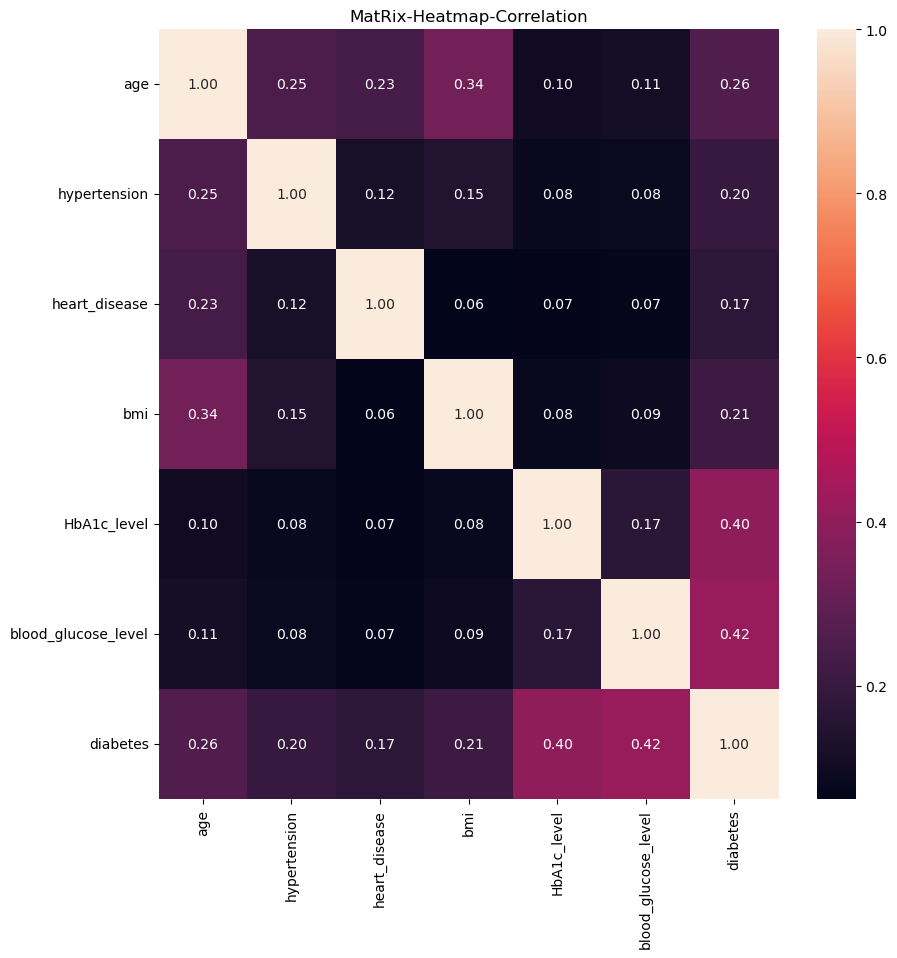

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f")
plt.title("MatRix-Heatmap-Correlation")
plt.show()

In [55]:
fs=SelectKBest(score_func=f_classif,k=5)
fs.fit(data.drop(columns="diabetes").select_dtypes("number").fillna(0),data["diabetes"])


SelectKBest(k=5)

In [56]:
print(["{:10f}".format(p)for p in fs.pvalues_])
print(["{:10f}".format(p)for p in fs.scores_])

['  0.000000', '  0.000000', '  0.000000', '  0.000000', '  0.000000', '  0.000000']
['7131.405852', '4072.706875', '3038.559564', '4816.113932', '19122.211184', '21363.054361']


In [57]:
pvalues_features=pd.DataFrame(fs.pvalues_)
scores_features=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="diabetes").select_dtypes("number").fillna(0).columns)
feature_score=pd.concat([pvalues_features,scores_features,features],axis=1)
feature_score.columns=["pvalues","scores","inputs"]
feature_score

,pvalues,scores,inputs
0,0.0,7131.405852,age
1,0.0,4072.706875,hypertension
2,0.0,3038.559564,heart_disease
3,0.0,4816.113932,bmi
4,0.0,19122.211184,HbA1c_level
5,0.0,21363.054361,blood_glucose_level


In [60]:
label_encoder=LabelEncoder()

for x in data:
    data[x]=label_encoder.fit_transform(data[x])
data    

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,101,0,1,4,1334,11,6,0
1,0,75,0,0,0,1547,11,0,0
2,1,49,0,0,4,1547,5,9,0
3,0,57,0,0,1,1160,4,8,0
4,1,97,1,1,1,829,3,8,0
...,...,...,...,...,...,...,...,...,...
99995,0,101,0,0,0,1547,9,2,0
99996,0,23,0,0,0,552,10,3,0
99997,1,87,0,0,3,1598,5,8,0
99998,0,45,0,0,4,2357,1,3,0


In [61]:
x=data.drop("diabetes",axis=1)
y=data["diabetes"]

In [62]:
# train_test_split:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
76513,1,70,0,0,2,1547,4,8
60406,1,85,0,0,4,1547,0,7
27322,0,45,0,0,1,1547,0,5
53699,0,76,0,0,1,1547,10,10
65412,1,35,0,0,0,913,9,1
...,...,...,...,...,...,...,...,...
6265,1,70,0,0,4,2113,5,0
54886,0,36,0,0,4,1625,4,10
76820,1,63,0,0,4,1429,6,1
860,0,58,0,0,4,1311,9,9


In [63]:
model=tree.DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [65]:
print(f"accuracy ------->>>>>>{model.score(x_test,y_test)*100:0.2f}%")

accuracy ------->>>>>>97.16%


In [66]:
text_represention=tree.export_text(model)
print(text_represention)

|--- feature_6 <= 11.50
|   |--- feature_7 <= 12.50
|   |   |--- feature_1 <= 74.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- feature_5 <= 2068.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  2068.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- feature_6 <= 4.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  4.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_1 >  74.50
|   |   |   |--- feature_6 <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  4.50
|   |   |   |   |--- feature_7 <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  3.50
|   |   |   |   |   |--- class: 0
|   |--- feature_7 >  12.50
|   |   |--- class: 1
|--- feature_6 >  11.50
|   |--- class: 1



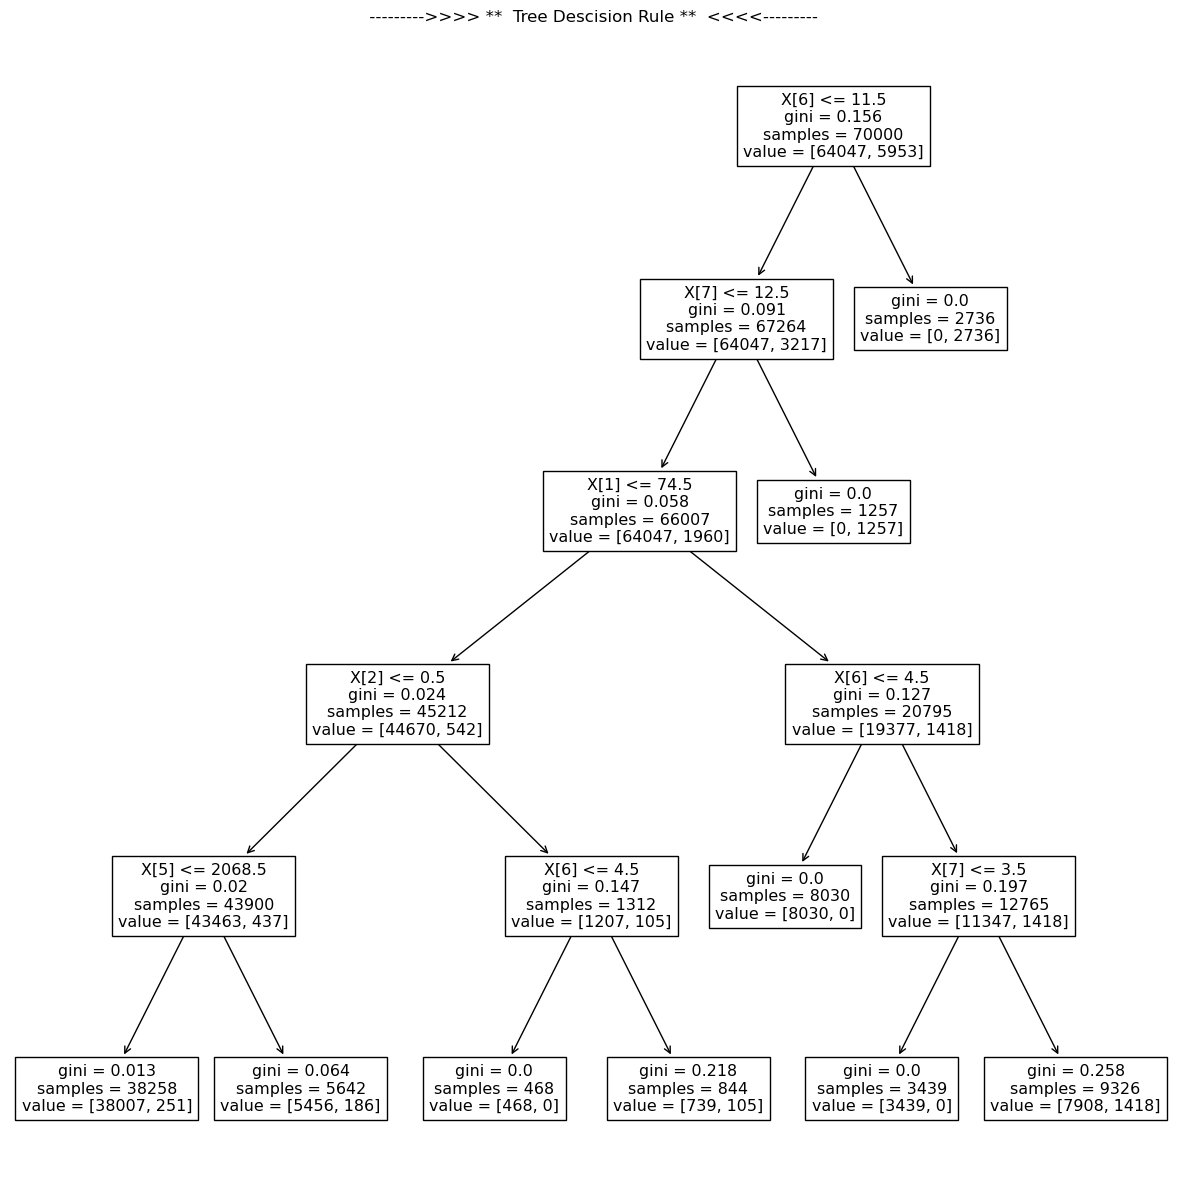

In [69]:
plt.figure(figsize=(15,15))
tree.plot_tree(model,max_depth=5)
plt.title(" --------->>>> **  Tree Descision Rule **  <<<<---------")
plt.show()

In [ ]:
#   ..............>-/\--/\-/\-/\->---->------->------>------>------->------>------>------>------->---->----->-----> *-* END *-* < -------<----- <------ <----- <---- <---- <---- <---- <---- <--- <--- <--- << ...............................